# Лабораторная работа 4

# Задание 1

In [ ]:
import pandas as pd

url = "seeds.csv"
df = pd.read_csv(url)

df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df_info = df.info()
df_description = df.describe()
missing_values = df.isnull().sum()
num_columns = df.shape[1]
feature_types = df.dtypes

df_info, df_description, missing_values, num_columns, feature_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


(None,
              Area   Perimeter  Compactness  Kernel.Length  Kernel.Width  \
 count  199.000000  199.000000   199.000000     199.000000    199.000000   
 mean    14.918744   14.595829     0.870811       5.643151      3.265533   
 std      2.919976    1.310445     0.023320       0.443593      0.378322   
 min     10.590000   12.410000     0.808100       4.899000      2.630000   
 25%     12.330000   13.470000     0.857100       5.267000      2.954500   
 50%     14.430000   14.370000     0.873400       5.541000      3.245000   
 75%     17.455000   15.805000     0.886800       6.002000      3.564500   
 max     21.180000   17.250000     0.918300       6.675000      4.033000   
 
        Asymmetry.Coeff  Kernel.Groove        Type  
 count       199.000000     199.000000  199.000000  
 mean          3.699217       5.420653    1.994975  
 std           1.471102       0.492718    0.813382  
 min           0.765100       4.519000    1.000000  
 25%           2.570000       5.046000    

In [ ]:
df_clean = df.dropna()

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

df_clean

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,-1.226341
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,-1.226341
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,-1.226341
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656,-1.226341
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825,-1.226341
...,...,...,...,...,...,...,...,...
194,-0.936866,-1.067843,0.321970,-1.143902,-0.753989,-0.046488,-1.120402,1.238729
195,-1.266465,-1.312651,-0.847353,-1.137122,-1.246874,0.426457,-0.849790,1.238729
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952,1.238729
197,-1.057032,-1.060193,-0.804363,-1.058022,-1.138227,-0.068977,-0.766368,1.238729


# Задание 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_clean[numeric_columns])

df_clean[['Cluster']].head()

,Cluster
0,2
1,2
2,2
3,2
4,2


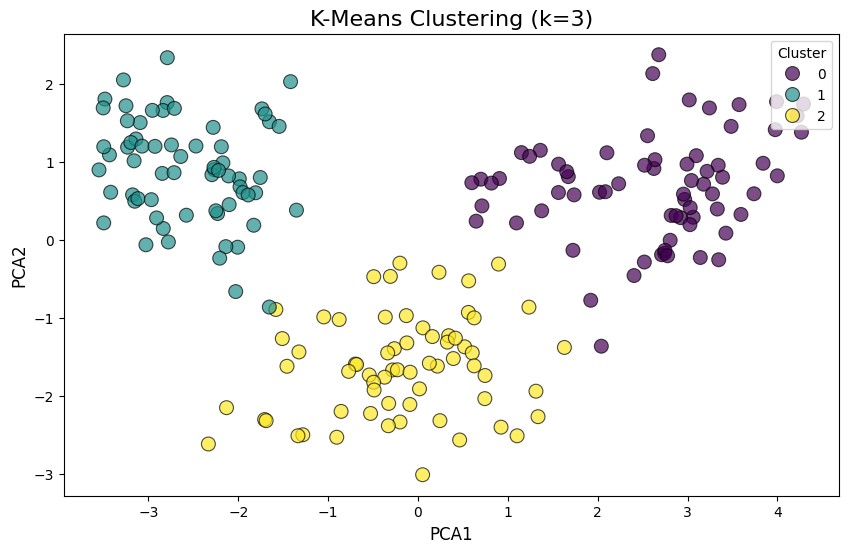

In [ ]:
pca = PCA(n_components=2)
df_clean['PCA1'], df_clean['PCA2'] = zip(*pca.fit_transform(df_clean[numeric_columns]))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clean, palette='viridis', s=100, alpha=0.7, edgecolor='black')
plt.title('K-Means Clustering (k=3)', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
sil_score = silhouette_score(df_clean[numeric_columns], df_clean['Cluster'])

print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.49


# Задание 3

In [ ]:
X = df_clean[numeric_columns]

sil_scores = {}

for n_components in range(2, 7):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_pca)

    sil_score = silhouette_score(X_pca, clusters)
    sil_scores[n_components] = sil_score

    print(f'Number of components: {n_components}, Silhouette Score: {sil_score:.4f}')


Number of components: 2, Silhouette Score: 0.6040
Number of components: 3, Silhouette Score: 0.5138
Number of components: 4, Silhouette Score: 0.4978
Number of components: 5, Silhouette Score: 0.4925
Number of components: 6, Silhouette Score: 0.4908


In [ ]:
optimal_n_components = max(sil_scores, key=sil_scores.get)
print(f'Optimal number of components: {optimal_n_components}')


Optimal number of components: 2


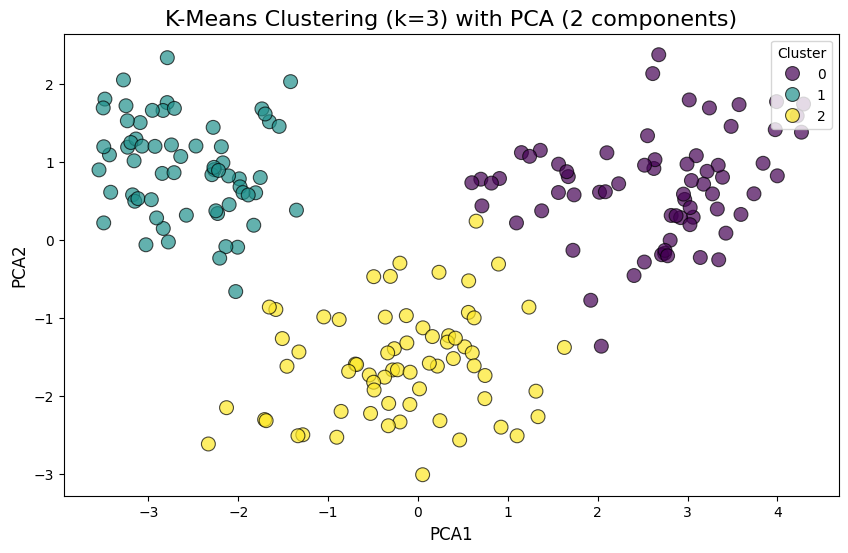

In [ ]:
pca = PCA(n_components=optimal_n_components)
X_pca_optimal = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_pca_optimal)

if optimal_n_components > 2:
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X_pca_optimal)
else:
    X_pca_2d = X_pca_optimal

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=df_clean['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='black')
plt.title(f'K-Means Clustering (k=3) with PCA ({optimal_n_components} components)', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Задание 4

In [ ]:
from sklearn.manifold import TSNE
X = df_clean[numeric_columns]

sil_scores_tsne = {}

for n_components in range(2, 7):
    tsne_method = 'exact' if n_components > 3 else 'barnes_hut'

    tsne = TSNE(n_components=n_components, random_state=42, method=tsne_method)
    X_tsne = tsne.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_tsne)

    sil_score = silhouette_score(X_tsne, clusters)
    sil_scores_tsne[n_components] = sil_score

    print(f'Number of components: {n_components}, Silhouette Score: {sil_score:.4f}')

Number of components: 2, Silhouette Score: 0.7971
Number of components: 3, Silhouette Score: 0.6586
Number of components: 4, Silhouette Score: 0.6415
Number of components: 5, Silhouette Score: 0.5720
Number of components: 6, Silhouette Score: 0.2164


In [ ]:
optimal_n_components_tsne = max(sil_scores_tsne, key=sil_scores_tsne.get)
print(f'Optimal number of components for t-SNE: {optimal_n_components_tsne}')

Optimal number of components for t-SNE: 2


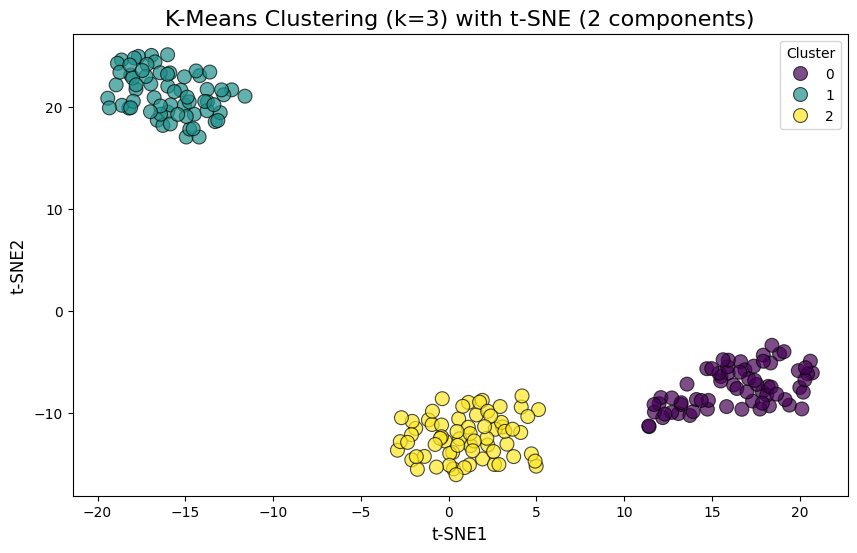

In [ ]:
tsne = TSNE(n_components=optimal_n_components_tsne, random_state=42, method='exact')
X_tsne_optimal = tsne.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_tsne_optimal)

if optimal_n_components_tsne > 2:
    X_tsne_2d = X_tsne_optimal[:, :2]
else:
    X_tsne_2d = X_tsne_optimal

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_2d[:, 0], y=X_tsne_2d[:, 1], hue=df_clean['Cluster'], palette='viridis', s=100, alpha=0.7, edgecolor='black')
plt.title(f'K-Means Clustering (k=3) with t-SNE ({optimal_n_components_tsne} components)', fontsize=16)
plt.xlabel('t-SNE1', fontsize=12)
plt.ylabel('t-SNE2', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Задание 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_clean[numeric_columns]

sil_scores_init = {}

init_methods = ['k-means++', 'random']

n_clusters = 3

random_states = [42, 0, 10, 99]

for init_method in init_methods:
    for state in random_states:
        kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=state)
        clusters = kmeans.fit_predict(X)

        sil_score = silhouette_score(X, clusters)

        sil_scores_init[(init_method, state)] = sil_score

        print(f"Init method: {init_method}, random_state: {state}, Silhouette Score: {sil_score:.4f}")

print("\nИтоги коэффициентов силуэта по методам инициализации:")
for key, value in sil_scores_init.items():
    print(f"Init method: {key[0]}, random_state: {key[1]} -> Silhouette Score: {value:.4f}")


Init method: k-means++, random_state: 42, Silhouette Score: 0.4901
Init method: k-means++, random_state: 0, Silhouette Score: 0.4901
Init method: k-means++, random_state: 10, Silhouette Score: 0.4901
Init method: k-means++, random_state: 99, Silhouette Score: 0.4901
Init method: random, random_state: 42, Silhouette Score: 0.4901
Init method: random, random_state: 0, Silhouette Score: 0.4901
Init method: random, random_state: 10, Silhouette Score: 0.4901
Init method: random, random_state: 99, Silhouette Score: 0.4901

Итоги коэффициентов силуэта по методам инициализации:
Init method: k-means++, random_state: 42 -> Silhouette Score: 0.4901
Init method: k-means++, random_state: 0 -> Silhouette Score: 0.4901
Init method: k-means++, random_state: 10 -> Silhouette Score: 0.4901
Init method: k-means++, random_state: 99 -> Silhouette Score: 0.4901
Init method: random, random_state: 42 -> Silhouette Score: 0.4901
Init method: random, random_state: 0 -> Silhouette Score: 0.4901
Init method: rand

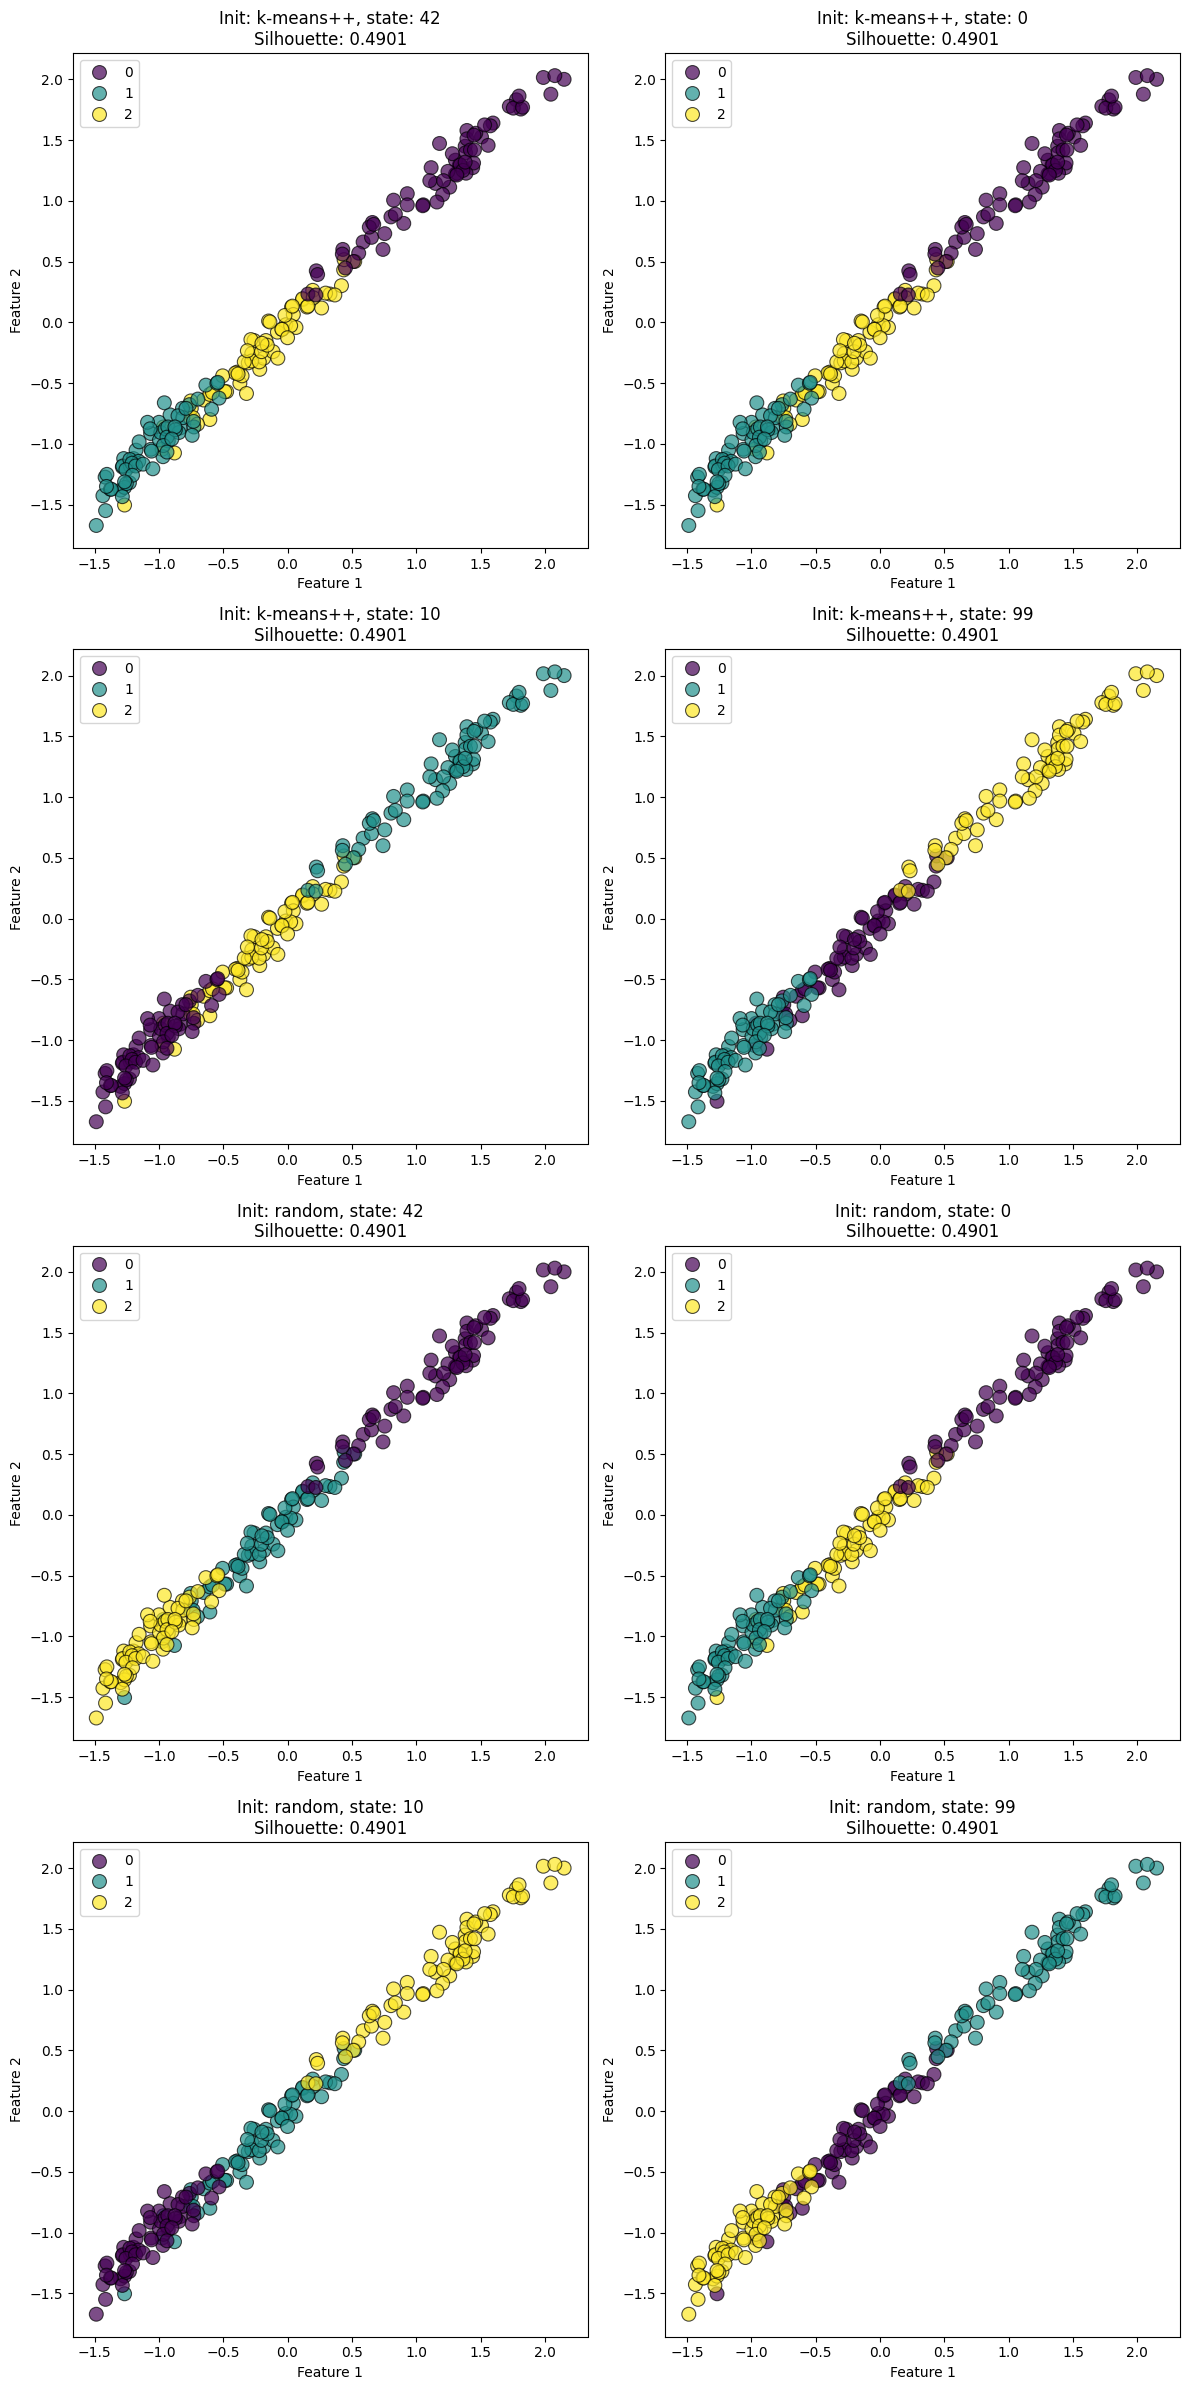

In [ ]:
n_plots = len(sil_scores_init)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

axes = axes.flatten()

for idx, (init_method, state) in enumerate(sil_scores_init.keys()):
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=state)
    clusters = kmeans.fit_predict(X)

    ax = axes[idx]
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.7, edgecolor='black', ax=ax)
    ax.set_title(f"Init: {init_method}, state: {state}\nSilhouette: {sil_scores_init[(init_method, state)]:.4f}")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

for i in range(n_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Задание 6

k = 2, Silhouette Score = 0.4126
k = 3, Silhouette Score = 0.4901
k = 4, Silhouette Score = 0.3911
k = 5, Silhouette Score = 0.3010
k = 6, Silhouette Score = 0.2442
k = 7, Silhouette Score = 0.2457
k = 8, Silhouette Score = 0.2565
k = 9, Silhouette Score = 0.2523
k = 10, Silhouette Score = 0.2535


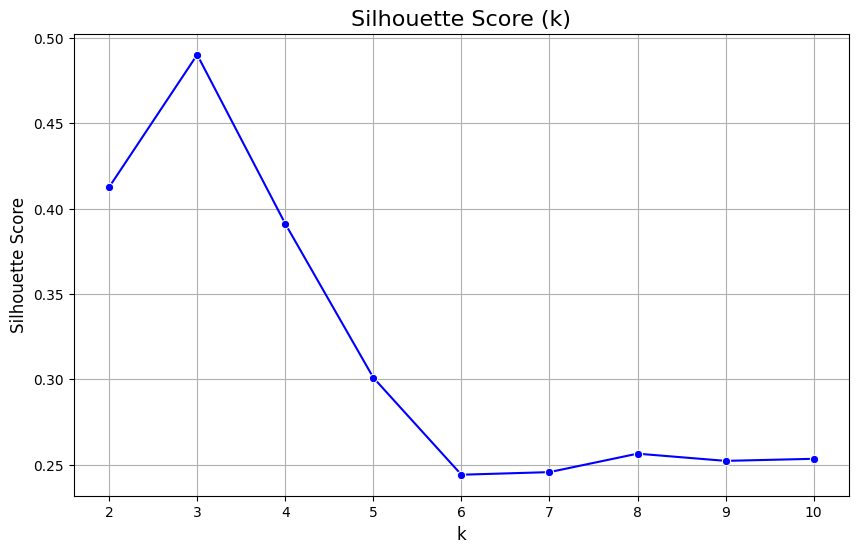

Optimal number of (k): 3


In [ ]:
X = df_clean[numeric_columns]

sil_scores_k = {}

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, clusters)

    sil_scores_k[k] = sil_score
    print(f'k = {k}, Silhouette Score = {sil_score:.4f}')

plt.figure(figsize=(10, 6))
sns.lineplot(x=list(sil_scores_k.keys()), y=list(sil_scores_k.values()), marker='o', color='b')
plt.title('Silhouette Score (k)', fontsize=16)
plt.xlabel('k', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

optimal_k = max(sil_scores_k, key=sil_scores_k.get)
print(f'Optimal number of (k): {optimal_k}')